In [10]:
# import necessary packages
import sys
sys.path.append('..')
import os
import pandas as pd
import numpy as np
import seaborn as sns
import neuropythy as ny
from itertools import product
from visualization import plot_annot_properties as vis
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
roi_list = ['V1','V2','V3','hV4','VO1','VO2', 'VO', 'cortex']

In [ ]:

v4vo12_file = '../derivatives/surface_areas_2022-02-27.csv'
v4vo12_df = pd.read_csv(v4vo12_file)
v4vo12_df['VO'] = v4vo12_df[['VO1','VO2']].sum(axis=1)
v4vo12_df = v4vo12_df.drop(columns=['message'])
v4vo12_df.head(5)

In [ ]:
long_mean_v4vo12_df = v4vo12_df.query('rater == "mean"')
long_mean_v4vo12_df = long_mean_v4vo12_df.rename(columns = {'rater': 'anatomist'})

In [ ]:
v123_df = ny.data['hcp_lines'].surface_area_dataframe
v_area_cols = [f'roi{hemi}{varea}' for hemi, varea in product(['L','R'], ['V1','V2','V3'])]
mean_v123_df = v123_df.query('anatomist == "mean"')
mean_v123_df = mean_v123_df.drop(columns=[col for col in mean_v123_df if col not in ['sid','anatomist']+v_area_cols])
mean_v123_df

In [2]:
long_mean_v123_df = vis.melt_roi_list_to_lh_rh(mean_v123_df, ['V1','V2','V3'], id_vars=['sid','anatomist'])
long_mean_v123_df

NameError: name 'vis' is not defined

In [3]:
mean_varea_df = pd.merge(long_mean_v123_df, long_mean_v4vo12_df, on=['sid','hemisphere','anatomist'])

NameError: name 'long_mean_v123_df' is not defined

In [4]:
col_list = mean_varea_df.drop(columns=roi_list).columns.to_list()
mean_varea_df = mean_varea_df[col_list + roi_list] # reorder

NameError: name 'mean_varea_df' is not defined

# Surface area correlations between different ROIs

<AxesSubplot:>

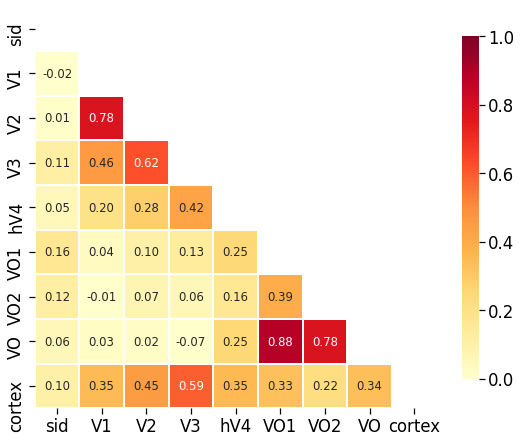

In [46]:
corr_matrix, mask = vis.get_correlation_matrix(mean_varea_df)
vis.heatmap_surface_area(corr_matrix, mask=mask, height=9, annot=True)

In [47]:
hemi_mean_varea_df = vis.unmelt_lh_rh_rois(mean_varea_df, roi_list)

In [48]:
hemi_corr_matrix = hemi_mean_varea_df.corr()
hemi_mask = np.triu(hemi_corr_matrix)

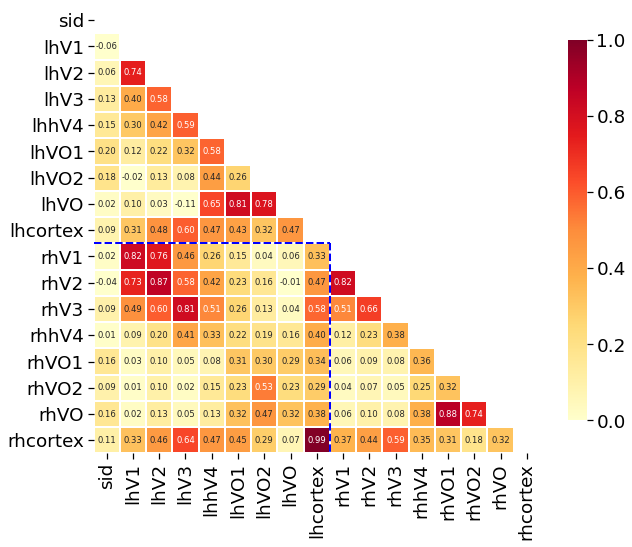

In [93]:
grid = vis.heatmap_surface_area(hemi_corr_matrix, mask=hemi_mask, height=10, boundary_line=len(roi_list)+1)

In [84]:
len(hemi_mean_varea_df.columns)

18

# Surface area comparison between different ROIs

In [50]:
long_surface_df = pd.melt(v4vo12_df, id_vars=['rater','sid','hemisphere','cortex'], value_vars=['hV4','VO2','VO1', 'VO'], var_name='roi', value_name='surface_area')
long_surface_df = long_surface_df.dropna()
long_surface_df = long_surface_df.query('rater != "mean"')

In [51]:
long_surface_df.head()

rater     sid hemisphere         cortex  roi  surface_area
0  BrendaQiu  100610         lh  107230.953125  hV4    781.737434
1  BrendaQiu  100610         rh  108015.562500  hV4    653.491056
2  BrendaQiu  102311         lh   99291.320312  hV4    584.953536
3  BrendaQiu  102311         rh  100608.046875  hV4    808.426349
4  BrendaQiu  102816         lh   91761.718750  hV4    961.528820

In [1]:
my_cmap = sns.diverging_palette(150, 20, s=50, l=60, sep=1, n=2, as_cmap=False)
grid = vis.violinplot_surface_area(long_surface_df, 'roi', x_order=['hV4','VO1','VO2', 'VO'], cmap=my_cmap, relative_area=False);

NameError: name 'sns' is not defined

<Figure size 720x720 with 0 Axes>

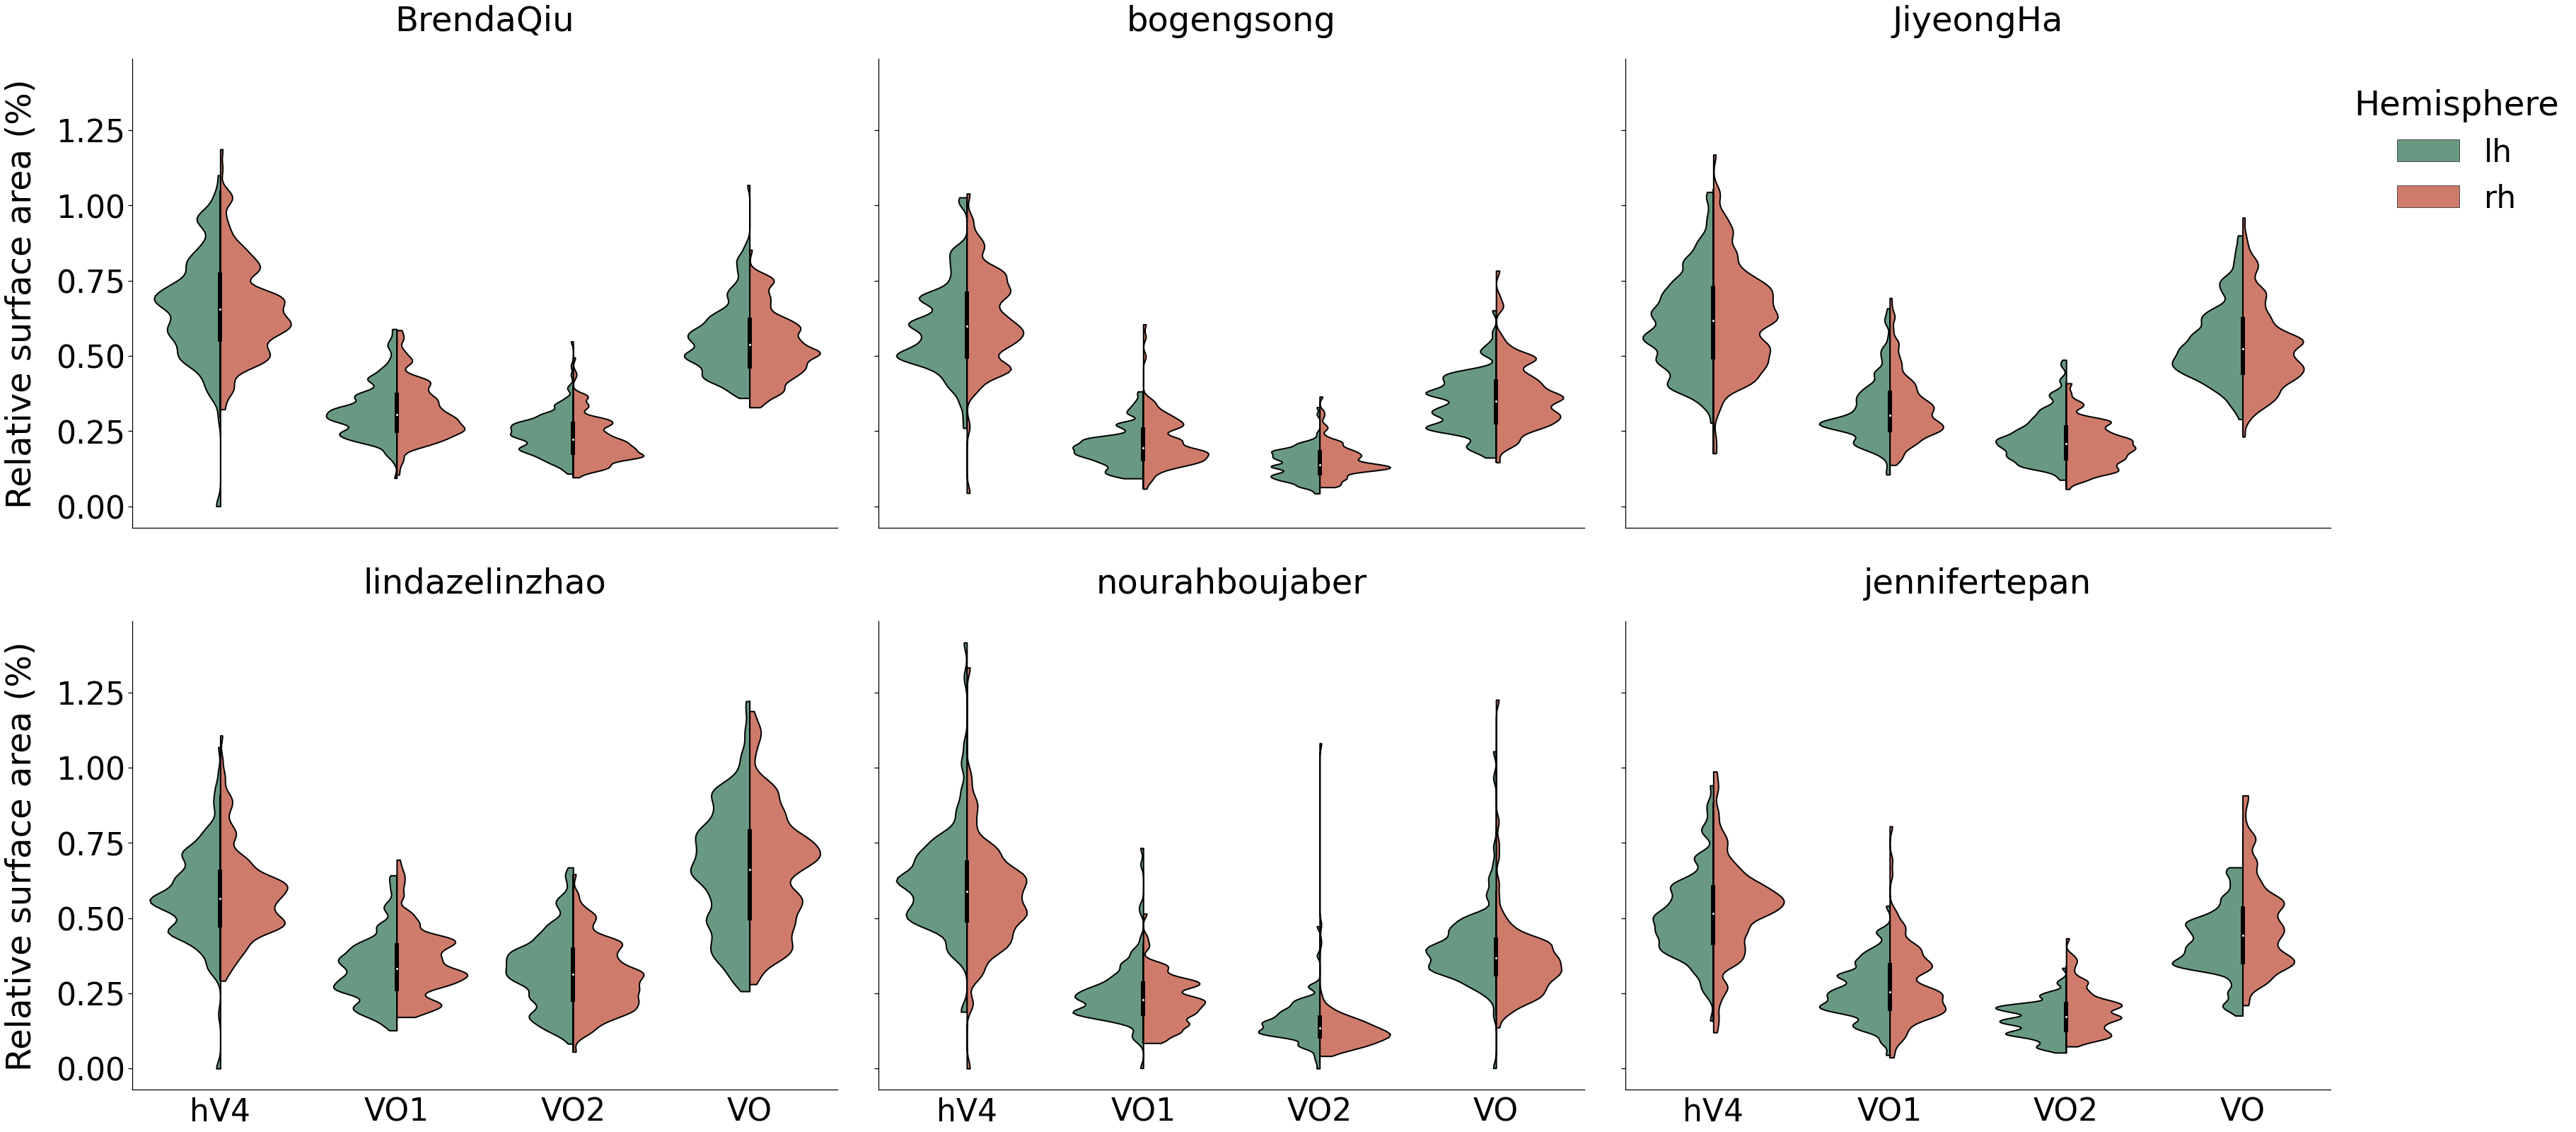

In [107]:
grid = vis.violinplot_surface_area(long_surface_df,
                                   x='roi',
                                   x_order=['hV4','VO1','VO2', 'VO'],
                                   hue='hemisphere',
                                   split=True,
                                   col='rater',
                                   col_wrap=3,
                                   height=12,
                                   cmap=my_cmap,
                                   relative_area=True)